<a href="https://colab.research.google.com/github/rodsei/data-science-ifes/blob/main/CIDA_Trabalho_1_Problema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O guia completo de Análise e Predição em Séries Temporais

---



### Conteúdo

1. [Introdução](https://colab.research.google.com/drive/188JT4eHzW0b2sTszzyKBmmbfCBQf06md#scrollTo=vLQXQ8pJ3dAD&line=1&uniqifier=1)
2. [Características e Estados](https://colab.research.google.com/drive/188JT4eHzW0b2sTszzyKBmmbfCBQf06md#scrollTo=tCx7VwPF5YrW&line=1&uniqifier=1)
3. [Modelando uma série temporal](https://colab.research.google.com/drive/188JT4eHzW0b2sTszzyKBmmbfCBQf06md#scrollTo=aTe7OD-wGwKp&line=1&uniqifier=1)
4. [Aplicando as técnicas](https://colab.research.google.com/drive/188JT4eHzW0b2sTszzyKBmmbfCBQf06md#scrollTo=31dBiOgtm7V-&line=1&uniqifier=1)

### Referência

Marco Peixeiro. The Complete Guide to Time Series Analysis and Forecasting. en. Jun. de 2021. url: https://towardsdatascience.com/the-complete-guide-to-time-series- analysis-and-forecasting-70d476bfe775 (acesso em 02/08/2021).

# 1. Introdução

Uma série temporal é um conjunto de dados ordenados de acordo com a linha temporal em que ocorreram. O tempo normalmente é a variável independente e o objetivo é realizar uma predição para os momentos futuros. Independente do contexto, quando se deseja predizer a tendência de algum evento, o tempo é primordial para definir quais ações podem ser tomadas a partir daquela previsão. Para lidar com séries temporais, é preciso conhecer alguns aspectos sobre os dados:

- Estado estacionário
- Presença de sazonalidade
- Variável alvo auto correlacionada

# 2. Características e Estados

## 2.1. Estado Estacionário

A série temporal é estacionária quando suas propriedades estatísticas não variam ao longo do temp, sendo elas a média, variância e covariância, onde as duas primeiras devem ser constantes e a última independente do tempo. 

Esse é o estado ideal para se criar um modelo de predição, mas alguns contextos naturalmente não são estacionários, como por exemplo, o mercado de ações. Caso a série não seja estacionária, é possível aplicar técnicas para transformá-la em um estado mais próximo do ideal.

Para verificar esse estado, é possível aplicar o teste estatístico de Dickey-Fuller, que utiliza como uma hipótese nula a presença de uma unidade raiz. Caso o resultado de p > 0, a série não é estacionária, caso contrário, com p = 0, a hipótese nula é rejeitada e a série é estacionária.

## 2.2. Sazonalidade

Representaas flutuações períodicas nos dados, que normalmente pode ser observada visualmente nos dados, se repetindo de uma forma semelhante em intervalos regulares como na imagem dos dados abaixo. O período demonstra o tamanho da sazonalidade.

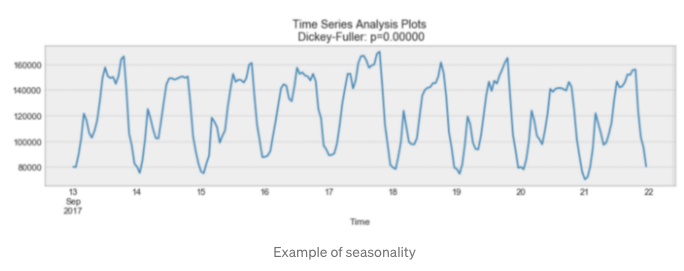

Cada ponto representa o início e o fim de um dia, e pode-se observar que existe um pico diário ao fim de cada intervalo de tempo. É possível obter a sazonalidade, derivando do gráfico de auto correlaçào, que vamos explicar a seguir, caso este tenha um formato senoidal.

## 2.3. Auto Correlação

A auto correlação pode ser identificada em uma série temporal, observando os dados originais comparados com um deslocamento temporal. Ao se aplicar esse deslocamento, obtemos o gráfico a seguir, com um formato senoidal.

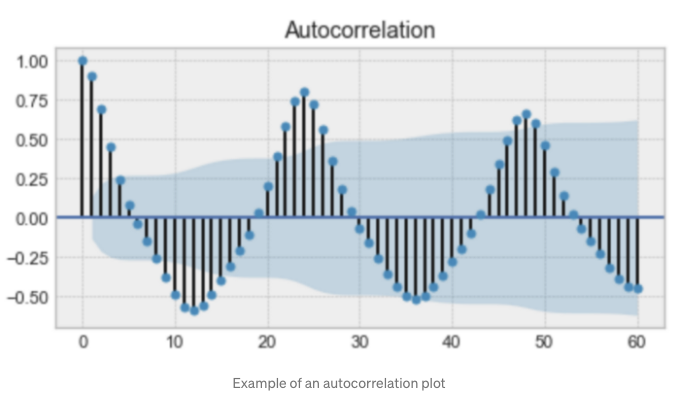

Visualmente é possível observar algumas correlações a cada 24 intervalos de tempo. Por exemplo, os momentos 0 e 24, assim como o 30 e 54, possuem uma alta correlação entre eles, sugerindo que teremos valores muito próximos dentro desses intervalos. Como mencionado anteriormente, o gráfico senoidal é um grande indicador da presença de sazonalidade, com seu tamanho determinado pelo intervalo de tempo com altas correlações identificado nas observações: 24 unidades.

# 3. Modelando uma série temporal

A seguir serão apresentadas algumas técnicas para se criar um modelo com base em séries temporais

## 3.1. Média Móvel

Esse modelo define que o próximo momento será a média de todos os momentos da janela anterior. Em termos de previsão, é de fato bem simplório, mas, apesar de não ser o método mais indicado para se criar um modelo preditivo para séries temporais, ele apresenta informações importantes para a identificação de tendências nos dados.

Conhecendo-se o intervalo de sazonalidade existente na série, aplicamos a média móvel em uma janela temporal de acordo com o tamanho da sazonalizade, que é de 24 unidades, obtendo o gráfico a seguir.



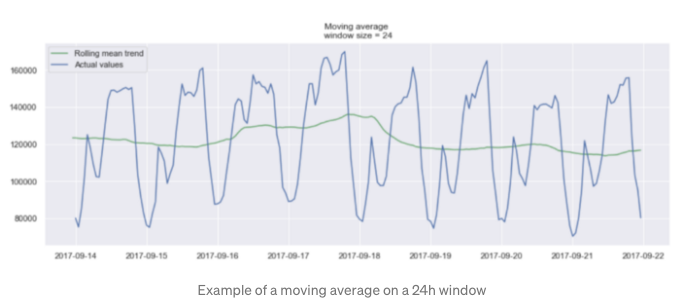

Quanto maior é o intervalo de tempo utilizado na janela temporal, mais suave será a tend6encia, por isso é importante conhecer o domínio do problema e as características existentes nos dados. Caso uma janela temporal menor seja aplicada, teremos algo que se aproxima da série original, como o gráfico a seguir, obtido com uma janela de 12 unidades. Nesse caso, essas informações não acrescentam nenhum valor à nossa análise.

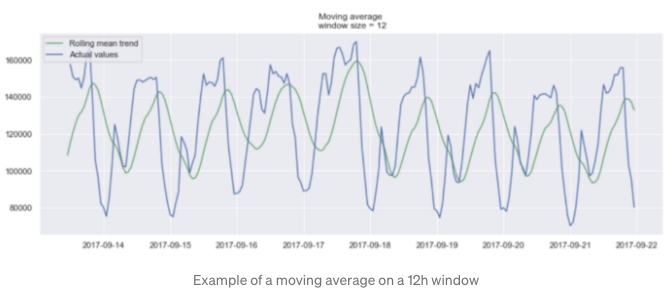

## 3.2. Suavização exponencial

Nesse método, os intervalos de tempo mais recentes têm uma importância maior na análise dos períodos de tempo. Para se obter esse comportamento matematicamente, podemos usar a fórmula a seguir para t > 0:

$$y = \alpha x_{t} + ( 1 - \alpha ) y_{t - 1}$$

O valor de alpha varia entre 0 e 1 e define a velocidade com que o peso diminui em relação aos períodos anteriores. Quanto mais alto o valor de alpha, maior o peso dos intervalos mais recentes, se aproximando da série original. Quanto menor o valor de alpha, mais próximo o modelo está da média móvel, como pode ser observado no gráfico abaixo, com a série azul escura e laranja utilizando alphas de 0.3 e 0.05 respectivamente.

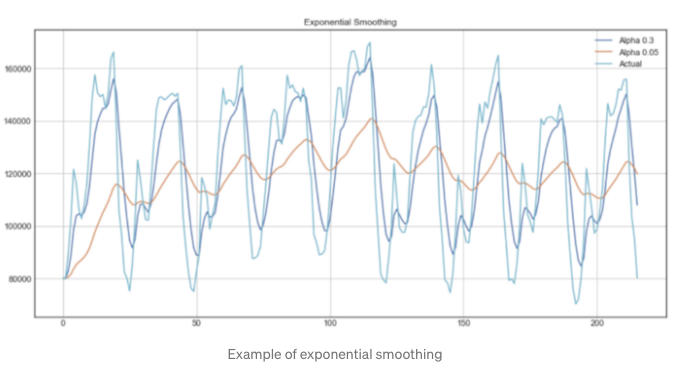

Quando existe uma tendência na série temporal, é possível utilizar uma suavização exponencial dupla, na qual a suavização exponencial é aplicada duas vezes de forma recursiva. Sendo assim, as fórmulas a seguir representam essa técnica, sendo $\beta$ o fator de suavização da tendência, também entre 0 e 1.

$$y = \alpha x_{t} + (1 - \alpha)(y_{t-1} + b_{t-1})$$

$$b_{t} = \beta(y_{t}-y_{t-1}) + (1 - \beta)b_{t-1}$$

O gráfico abaixo mostra um comparativo dos resultados obtidos com vários fatores de suavização distintos.

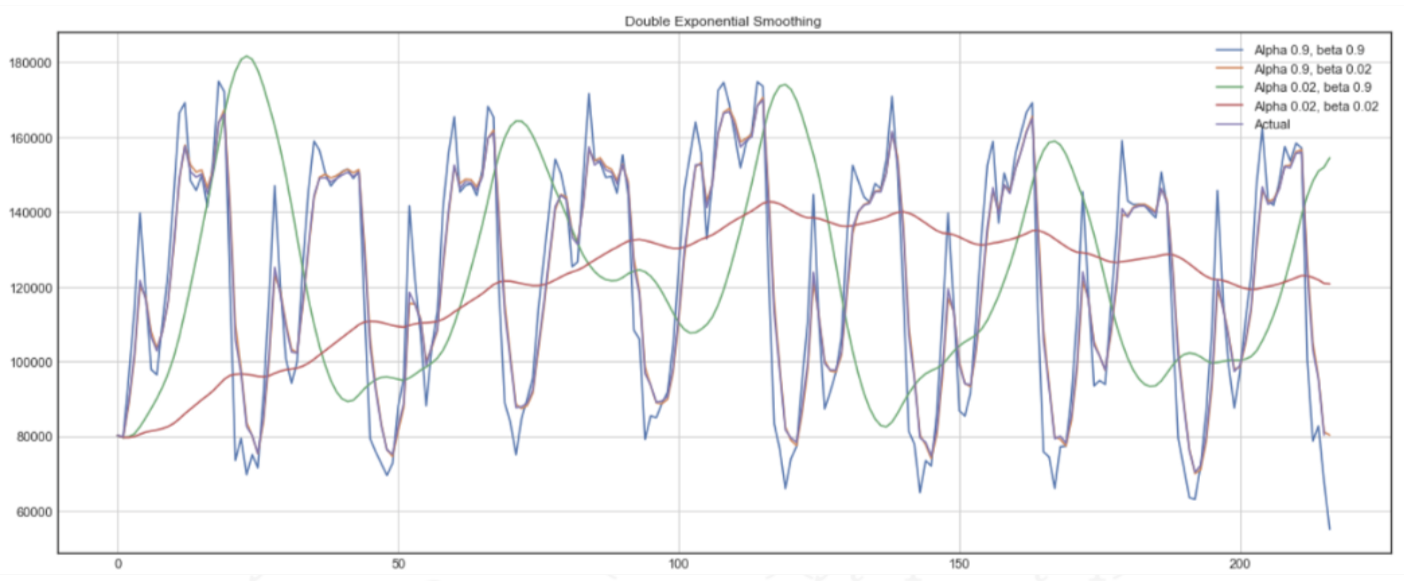

Assim como a tendência, essa técnica também pode ser estendida para aplicar a suavização da sazonalidade em conjunto com a tendência, chegando num próximo estágio de suavização exponencial tripla, que elimina da série temporal todos os ruídos existentes. As fórmulas que representam essa técnica estendida são apresentadas a seguir, sendo $\gamma$ o fator de suavização sazonal e L o tamanho da sazonalidade.

$$y = \alpha \frac{x_{t}}{c_{t-L}} + (1 - \alpha)(y_{t-1} + b_{t-1})$$

$$b_{t} = \beta(y_{t}-y_{t-1}) + (1 - \beta)b_{t-1}$$

$$c_{t} = \gamma \frac{x_t}{y_{t}} + (1-\gamma)c_{t-L}$$

## 3.3. SARIMA

Esse modelo é a combinação de alguns modelos mais simples que removem as propriedades das séries que não são estacionárias e que apresentam sazonalidade. Esses modelos se baseiam na comparação das séries originais com deslocamentos temporais, utilizando uma regressão da série com ela mesma em um momento antetior. 

Um dos modelos é o **AR (*Autoregression model*)** que utiliza um parâmetro **p** representando o deslocamento máximo na linha temporal, que pode ser encontrado observando o gráfico de auto correlação parcial. No exemplo apresentado, p = 4.

O outro modelo é o **MA (*Moving Average Model*)** que utiliza o parâmetro **q** representando o maior deslocamento significante no gráfico de auto correlação. No exemplo apresentado, q = 4.

A seguir estão os gráficos de exemplo de Auto correlação parcial (p) e Auto correlação (q), respectivamente:

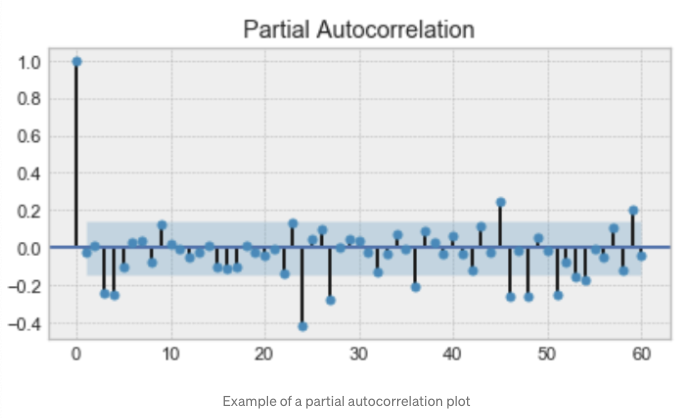

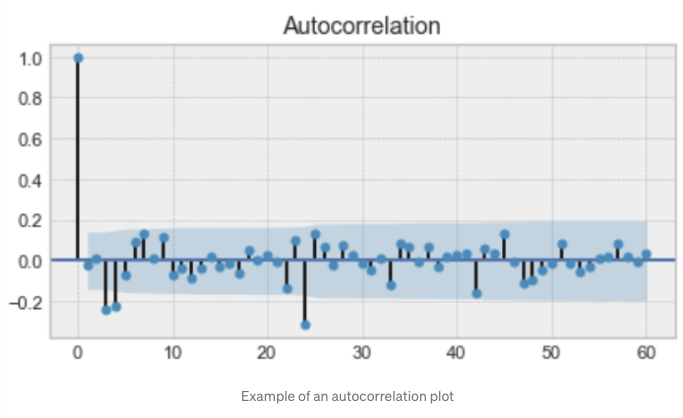

Após a descoberta dos dois primeiros parâmetros, são adicionados mais dois componentes, sendo eles, o *I (**Order of Integration**)* representado pelo parâmetro **d** que determina o número de deslocamentos necessários para tornar a série estacionária, e o tamanho de intervalos da sazonalidade *S*.
Todos esses componentes combinados formam o modelo SARIMA(P,D,Q,s), mas é importante lembrar que apesar de combinar esses modelos, o modelo final ainda exige que a série passe pelas transformações necessárias para remover a presença de sazonalidade e características não estacionárias.

# 4. Aplicando as técnicas

## 4.1. Predizendo valor de ações

Apesar de não ser possível predizer os valores de ações com segurança, vamos utilizar o contexto para aplicar as técnicas e observar na prática como elas se comportam. A base de dados utilizada como exemplo é da empresa *New Germany Fund* (GF), uma amostra com 1000 linhas extraído dos dados históricos dos das ações americanas entre 2013 e 2018.

In [1]:
# Lendo a base de dados com o Pandas
import pandas as pd
data_url = "https://raw.githubusercontent.com/marcopeix/stock-prediction/master/data/stock_prices_sample.csv"
data = pd.read_csv(data_url, index_col=['DATE'], parse_dates=['DATE'])
data.head()

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.23,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.14,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.16,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.9100,18.87,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.8900,18.79,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0


Os dados relevantes para a análise são referenes à ação GF e que sejam dados de fechamento do dia. Os dados referentes às operações internas do dia não serão considerados na análise. Os dados que representam essas informações serão removidos a seguir, juntamente com as colunas que também não serão relevantes para a análise.

In [2]:
data = data[data.TICKER == 'GF']
data = data[data.TYPE == 'EOD']

drop_cols = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']

data.drop(drop_cols, axis=1, inplace=True)

data.head()

,TICKER,OPEN,HIGH,LOW,CLOSE
DATE,,,,,
2018-06-04,GF,18.86,18.890,18.7900,18.8100
2018-06-01,GF,18.58,18.760,18.5800,18.7400
2018-05-31,GF,18.52,18.520,18.3012,18.4900
2018-05-30,GF,18.47,18.678,18.4700,18.6500
2018-05-29,GF,18.51,18.510,18.1500,18.2562


### 4.1.1. Análise Exploratória

A seguir, vamos realizar algumas análises exploratórias, começando pela visualização dos dados históricos dos preços de fechamento.

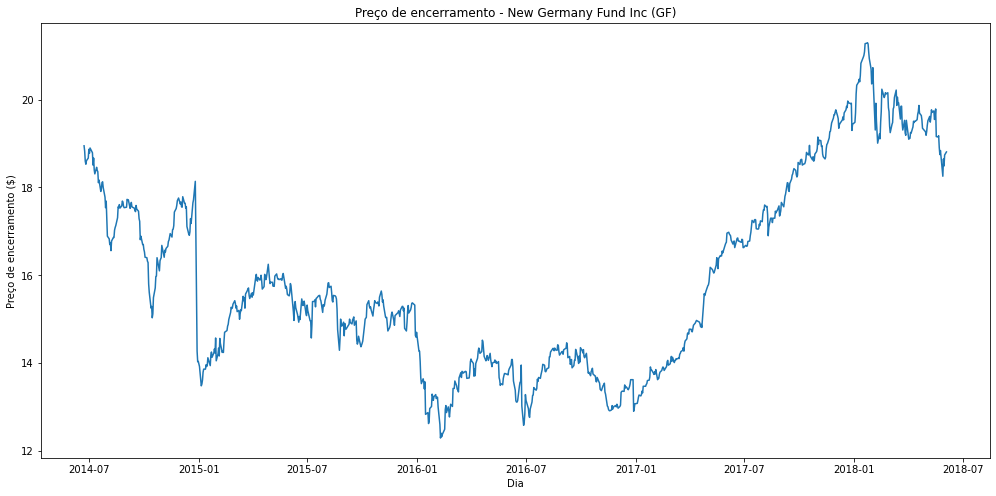

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 8))
plt.plot(data.CLOSE)
plt.title('Preço de encerramento - New Germany Fund Inc (GF)')
plt.ylabel('Preço de encerramento ($)')
plt.xlabel('Dia')
plt.grid(False)
plt.show()

Como a série não é estacionária, vamos calcular a média móvel para encontrar a janela de tempo que apresenta uma melhor visibilidade da tendência. Antes de visualizar os gráficos, vamos criar uma função que calcula a média móvel e plota os gráficos.

In [4]:
import numpy as np
from sklearn.metrics import mean_absolute_error
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Média móvel\n janela temporal = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Tendência da média móvel')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Valores originais')
    plt.legend(loc='best')
    plt.grid(True)

Com a função criada, vamos analisar três janelas: 5 dias, 30 dias e 90 dias

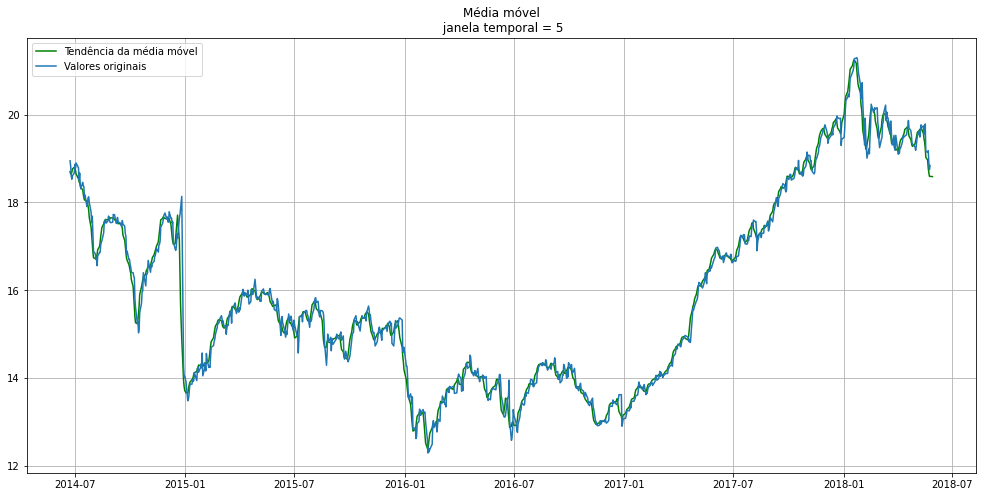

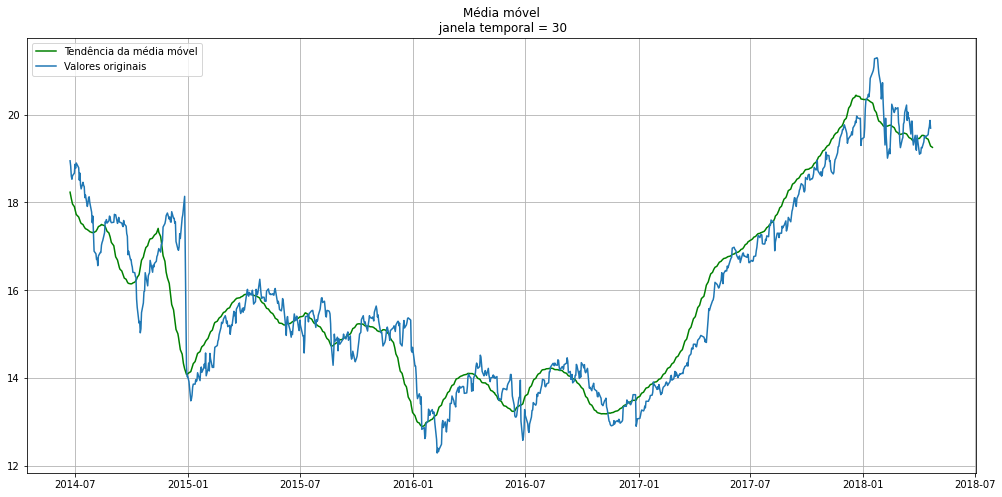

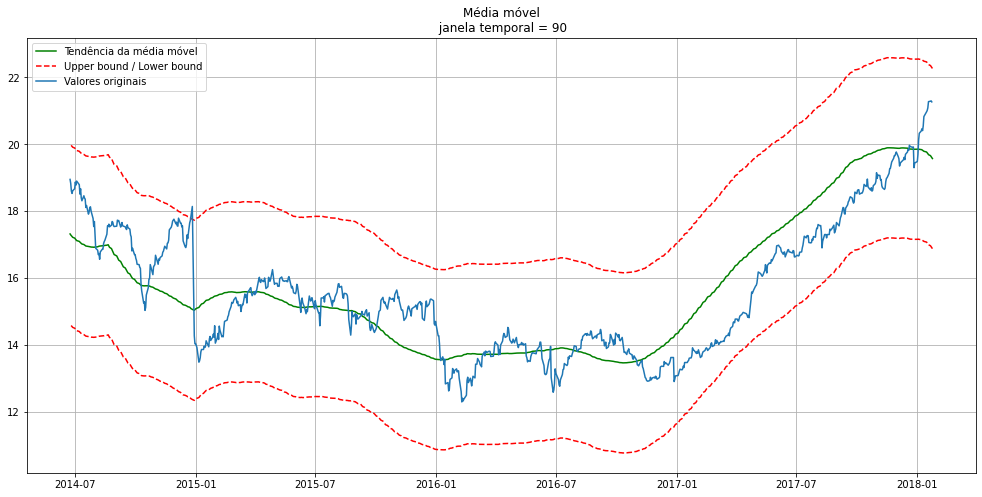

In [5]:
plot_moving_average(data.CLOSE, 5) # Semanal
plot_moving_average(data.CLOSE, 30) # Mensal
plot_moving_average(data.CLOSE, 90, plot_intervals=True) # Trimestral

Analisando os resultados, podemos ver que na janela de 5 dias a média móvel fica muito próxima dos dados originais. Já nos resultados das janelas temporais de 30 e 90 dias, podemos visualizar as tendências mais claramente, principalmente no ponto mais recente da série, com uma tendência de descida, ou seja, os valores das ações vão ficar mais baratas nos próximos dias.

Para continuar a análise exploratória, vamos seguir aplicando uma suavização exponencial. Na sequencia, criaremos a função de suavização seguida da função que plotará o gráfico com alguns valores de teste para comparação.

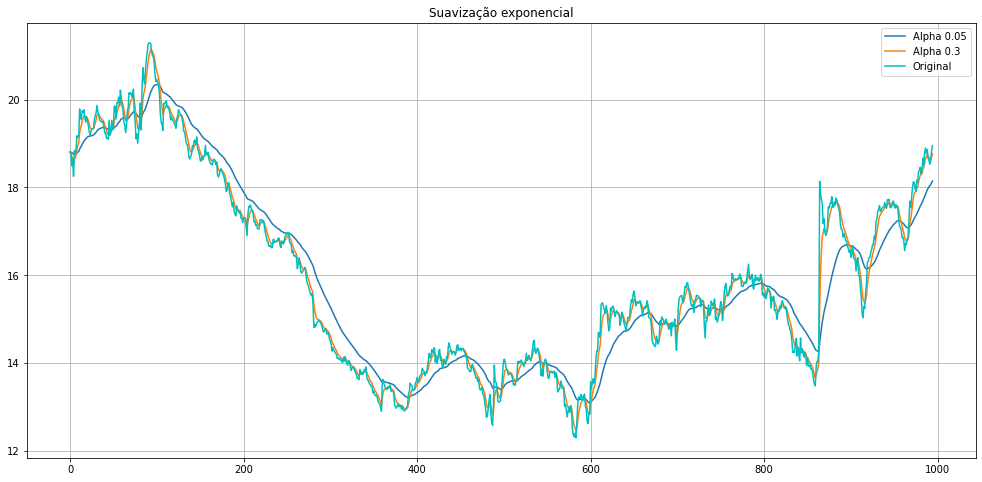

In [6]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Original")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Suavização exponencial")
    plt.grid(True);

plot_exponential_smoothing(data.CLOSE, [0.05, 0.3])

Utilizando um valor de alpha de 0.05, obtivemos uma suavização da curva com a presença das tendências de alta e baixa.

Para finalizar a análise exploratória, vamos plotar o gráfico da suavização exponencial dupla, utilizando algumas combinações entre alpha e beta de 0,9 e 0,02.

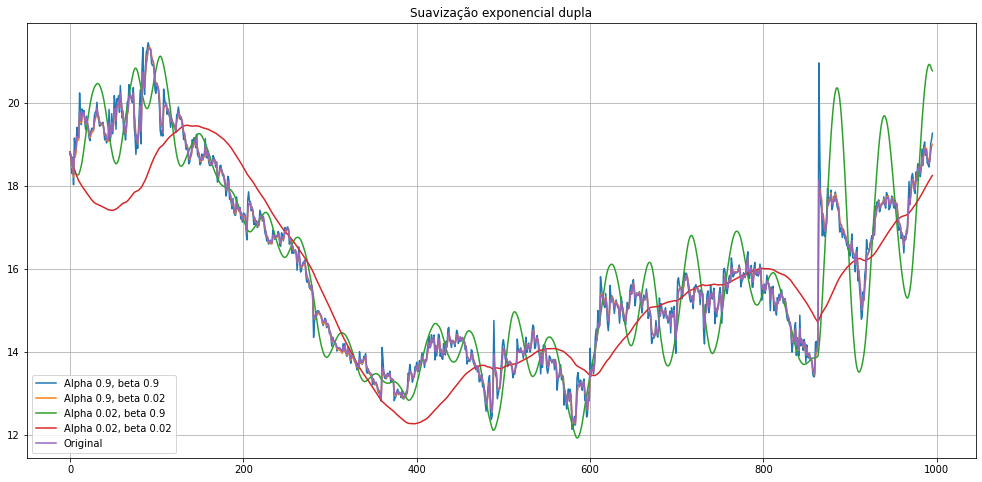

In [7]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Original")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Suavização exponencial dupla")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.CLOSE, alphas=[0.9, 0.02], betas=[0.9, 0.02])

### 4.1.2. Teste estatístico

Apesar de termos visualizado durante a análise exploratória, vamos executar o teste estatístico Dickey-Fuller para validar o estado da série. A seguir, segue a função que calcula e plota o resultado obtido no teste.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


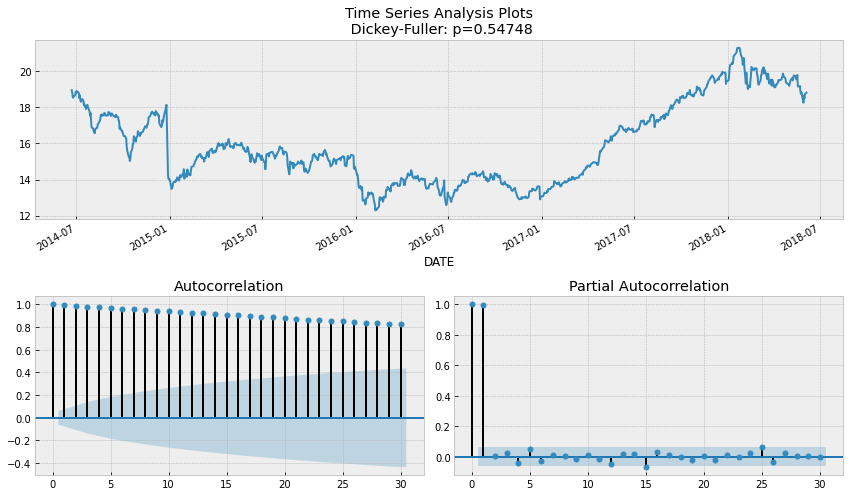

In [8]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.CLOSE, lags=30)

### 4.1.3. Transformando em série estacionária

Após analisar e validar as características não estacionárias da série temporal, precisamos transformá-la em uma série estacionária para criar um modelo preditivo. Para isso aplicaremos uma diferenciação de primeira ordem, subtraindo os valores da série com sues próprios valores deslocados em um intervalo.

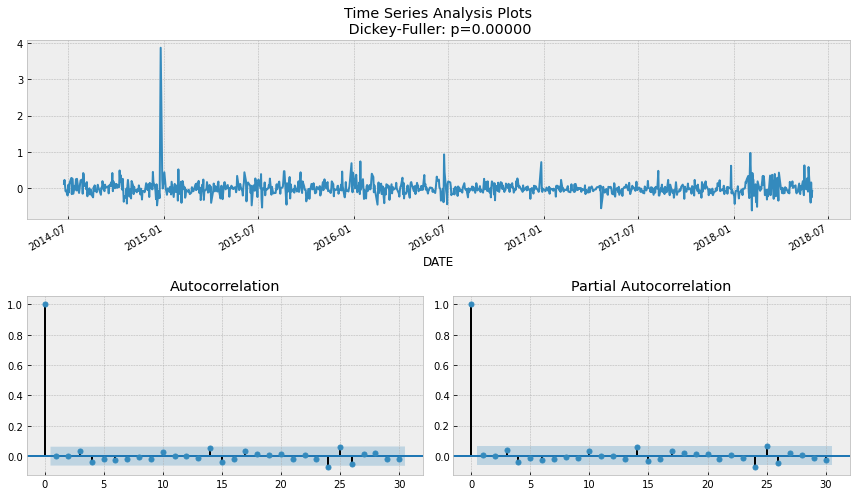

In [9]:
# Take the first difference to remove to make the process stationary
data_diff = data.CLOSE - data.CLOSE.shift(1)
tsplot(data_diff[1:], lags=30)

### 4.1.4. Prevendo com o SARIMA

Com a série temporal transformada em uma série estacionária, já é possível aplicar o modelo SARIMA e realizar as predições. Para encontrar o melhor modelo, será utilizada um método de otimização dos parâmetros do SARIMA, uma vez que não temos um comportamento único em relação à sazonalidade e à tendência. 

Com base nas análises exploratórias, vamos delimitar os parâmetros da seguinte forma, criando listas com as combinações possíveis:

In [10]:
from itertools import product

ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

# Criamos uma lista com todas as combinações possíveis
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

Com os valores de teste criados, vamos criar a função de otimização:

In [12]:
import statsmodels.api as sm

# Treinando vários modelos SARIMA para encontrar a melhor combinação de parâmetros
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in parameters_list:
        try: model = sm.tsa.statespace.SARIMAX(data.CLOSE, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

A lista de parâmetros gera 625 combinações possíveis para testar no treinamento do SARIMA para encontrar o modelo com melhor performance. O modelo será treinado para predizer o preço das ações nos próximos cinco dias 

In [ ]:
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(data.CLOSE, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())


                                 Statespace Model Results                                
Dep. Variable:                             CLOSE   No. Observations:                  995
Model:             SARIMAX(0, 1, 0)x(2, 1, 4, 5)   Log Likelihood                 148.875
Date:                           Fri, 06 Aug 2021   AIC                           -283.751
Time:                                   18:51:46   BIC                           -249.474
Sample:                                        0   HQIC                          -270.716
                                           - 995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.4956      0.162     -3.062      0.002      -0.813      -0.178
ar.S.L10      -0.7540      0.157     -4.79

Após encontrar as melhores combinações de parâmetros, obtemos um modelo muito bom que possui uma um erro percentual absoluto médio (MAPE - Mean Absolute Percentage Error) de 0,79%.
Podemos comparar os dados preditos com os dados reais para mais análises. Os dados reais foram obtidos a partir da seção financeira do site [Yahoo Finance](https://ca.finance.yahoo.com/).

No handles with labels found to put in legend.


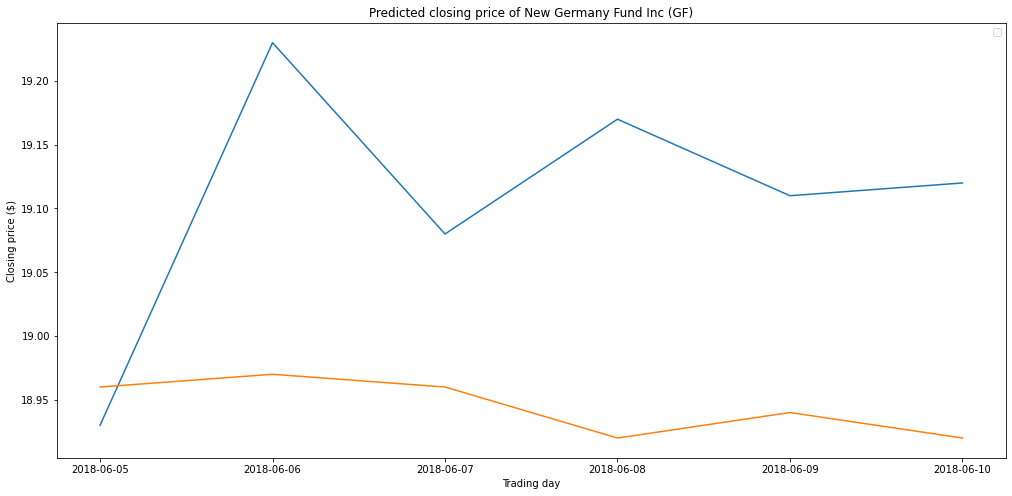

In [13]:
# Utilizando os dados reais para comparar com o preditos
comparison = pd.DataFrame({'actual': [18.93, 19.23, 19.08, 19.17, 19.11, 19.12],
                          'predicted': [18.96, 18.97, 18.96, 18.92, 18.94, 18.92]}, 
                          index = pd.date_range(start='2018-06-05', periods=6,))


#Plota o gráfico da comparação

plt.figure(figsize=(17, 8))
plt.plot(comparison.actual)
plt.plot(comparison.predicted)
plt.title('Predicted closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.legend(loc='best')
plt.grid(False)
plt.show()

Analisando as comparações podemos notar que o modelo, mesmo obtendo resultados relativamente bons no treinamento, não conseguiu reproduzir o comportamento da série, principalmente pelo alto grau de complexidade do mercado fiananceiro, o que torna a tarefa de predizer os resultados corretos quase impossível. Apesar do comportamento ruim no mundo real, foi possível observar os métodos envolvidos na transformação de uma série não-estacionária aplicando as técnicas cabíveis. Nesse momento vimos que todos os processos foram manuais e demandam um conhecimento estatístico e matemático mais avançados.

## 4.2. Predizendo a qualidade do ar com o Prophet

Nesse projeto, vamos utilizar o Prophet, um procedimento criado pelo Facebook para lidar com predições de séries temporais de forma automatizada, principalmente nas séries que possuem mais efeitos sazonais e muitos dados históricos de temporadas anteriores.

Para esse projeto, a base de dados será sobre a qualidade do ar, contendo informações sobre diferentes gases, registradas a cada hora do dia e pode ser encontrada no [Kaggle](https://www.kaggle.com/sayakchakraborty/air-quality-prediction-of-relative-humidity).

In [115]:
data_url = 'https://raw.githubusercontent.com/marcopeix/air-quality/master/data/AirQualityUCI.csv'
p2_data = pd.read_csv(data_url, sep=';')
p2_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


### 4.2.1. Preparando a base de dados

A base de dados contém alguns problemas que devem ser tratados antes de prosseguir com a modelagem. A seguir vamos tratar cada um deles.
Primeiramente, começando pelas colunas que estão com os tipos incorretos, deveriam ser numéricas ou datas mas estão representadas como objetos.

In [116]:
print(p2_data.dtypes)
# Utilizando datas com o tipo correto
p2_data['Date'] = pd.to_datetime(p2_data['Date'])

# Convetendo valores em valores numéricos
for col in p2_data.iloc[:,2:].columns:
    if p2_data[col].dtypes == object:
        p2_data[col] = p2_data[col].str.replace(',', '.').astype('float')

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


Com os dados nos tipos corretos, a seguir, vamos veriricar os valores de cada coluna, as estatísticas de cada uma e a quantidade de valores nulos.

In [138]:
def verify_dataset(dataset):
  num_types = dataset.dtypes == 'float64'
  num_columns = dataset.columns[num_types==True]
  print(f"{'Coluna':14}  {'Mínimo'}  {'Máximo'}   {'Média'}   {'Nulos'} / {'Total'}")
  for column in num_columns:
    print(f"{column:14}{dataset[column].min():8}{dataset[column].max():8}{round(dataset[column].mean(),1):8}{dataset[column].isna().sum():8} /{len(dataset[column]):6}")

verify_dataset(p2_data)

Coluna          Mínimo  Máximo   Média   Nulos / Total
CO(GT)          -200.0    11.9   -34.2     114 /  9471
PT08.S1(CO)     -200.0  2040.0  1049.0     114 /  9471
NMHC(GT)        -200.0  1189.0  -159.1     114 /  9471
C6H6(GT)        -200.0    63.7     1.9     114 /  9471
PT08.S2(NMHC)   -200.0  2214.0   894.6     114 /  9471
NOx(GT)         -200.0  1479.0   168.6     114 /  9471
PT08.S3(NOx)    -200.0  2683.0   795.0     114 /  9471
NO2(GT)         -200.0   340.0    58.1     114 /  9471
PT08.S4(NO2)    -200.0  2775.0  1391.5     114 /  9471
PT08.S5(O3)     -200.0  2523.0   975.1     114 /  9471
T               -200.0    44.6     9.8     114 /  9471
RH              -200.0    88.7    39.5     114 /  9471
AH              -200.0   2.231    -6.8     114 /  9471
Unnamed: 15        nan     nan     nan    9471 /  9471
Unnamed: 16        nan     nan     nan    9471 /  9471


Podemos observar a presença de valores de concentração de gases negativos, que é uma inconformidade nas medições, assim como valores nulos em todas as colunas da base. Antes de aplicar essas correções, vamos fazer um agrupamento dos dados para remover as medições de hora em hora e trabalhar apenas com as datas, utilizando apenas os valores positivos na visão sumarizada para desonsiderar os erros de medição que podem causar distorções durante a criação do modelo.

In [139]:
# Calcula a média considerando apenas os valores positivos
def positive_average(num):
    return num[num > -200].mean()

# Dados d=sumarizados por dia, desconsiderando a hora
daily_data = p2_data.drop('Time', axis=1).groupby('Date').apply(positive_average)

# Remove colunas que possuem mais de oito valores nulos
daily_data = daily_data.iloc[:,(daily_data.isna().sum() <= 8).values]

# Remove linhas que contém valores nulos
daily_data = daily_data.dropna()

# Criando novo agrupamento dos dados em semanas
weekly_data = daily_data.resample('W').mean()

O motivo de se removendo colunas que possuem mais de 8 valores nulos é uma forma de não perder muitos dados na hora de remover todas as linhas que também possuem valores nulos.

In [146]:
weekly_data

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,
2004-01-04,1244.380952,11.971429,1010.428571,880.666667,1644.380952,1155.857143,15.519048,51.133333,0.854881
2004-01-11,1136.801760,11.674457,1009.344462,760.484990,1727.833075,1083.683747,24.564726,53.224017,1.526858
2004-01-18,1173.375000,13.429167,1050.458333,1490.333333,1448.541667,1196.333333,10.891667,77.000000,1.002796
2004-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2005-11-06,1313.642512,12.759239,1048.920290,591.418478,1320.113527,1551.095411,10.602234,54.324577,0.699886
2005-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com os dados tratados podemos visualizar como os dados estão distribuídos na visão semanal. Vamos verificar o comportamento do Óxido de Nitrogênio, representado pela coluna PT08.S3(NOx), um gás que produz fumaça e chuvas ácidas, provocando problemas de saúde.

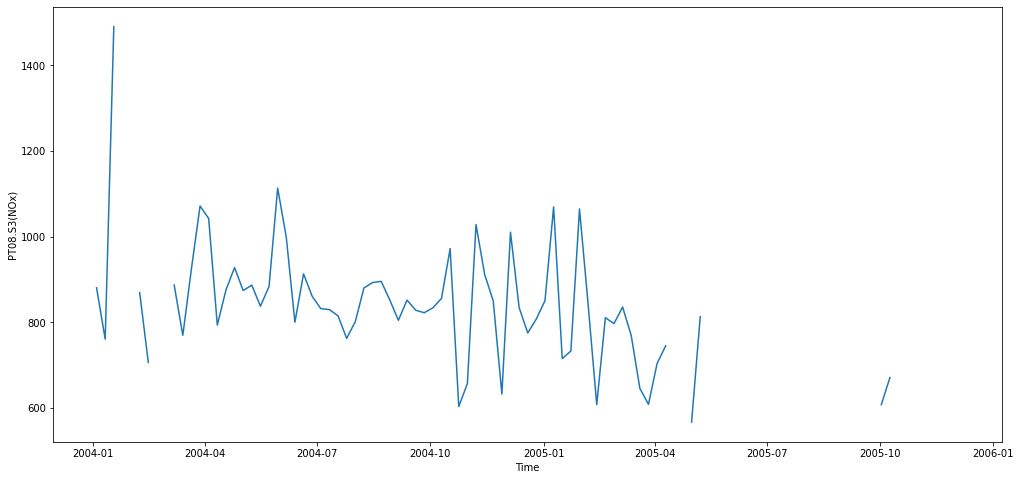

In [161]:
# Plota a concentração semanal de cada gás
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(weekly_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
plot_data('PT08.S3(NOx)')

### 4.2.2. Criando o modelo

Uma vez que vamos trabalhar apenas com um dos gases, podemos dispensar as demais colunas.

In [163]:
cols_to_drop = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
weekly_data = weekly_data.drop(cols_to_drop, axis=1)

A partir de agora, vamos começar a utilizar o ***Prophet***, importando as bibliotecas e tratando os nomes das colunas conforme recomendado pelo guia de boas práticas, nomeando a coluna de data como ***ds*** e a coluna de valor como ***y***.

In [164]:
# Import Prophet
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Change the column names according to Prophet's guidelines
df = weekly_data.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2004-01-04,880.666667
1,2004-01-11,760.484990
2,2004-01-18,1490.333333
3,2004-01-25,NaN
4,2004-02-01,NaN


Para podermos avaliar os resultados obtidos pelo modelo, vamos separar a base de dados de treino e de teste. Lembrando que por se tratar de uma série temporal, precisamos manter os dados históricos ordenados. Par isso definimos o tamanho da base de predição (testes) e separamos os dados iniciais para o treinamento.

In [167]:
# Split into a train/test set
prediction_size = 30
train_df = df[:-prediction_size]

Com a base de dados de treino e teste separadas, já podemos instanciar o modelo e realizar as predições, visualizando os dados preditos pelo modelo a seguir.


In [168]:
# Initialize and train a model
m = Prophet()
m.fit(train_df)

# Make predictions
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-04,955.045776,787.084803,1122.676863,955.045776,955.045776,0.0,0.0,0.0,0.0,0.0,0.0,955.045776
1,2004-01-11,951.998470,791.674419,1115.076333,951.998470,951.998470,0.0,0.0,0.0,0.0,0.0,0.0,951.998470
2,2004-01-18,948.951165,780.429529,1117.232694,948.951165,948.951165,0.0,0.0,0.0,0.0,0.0,0.0,948.951165
3,2004-01-25,945.903859,782.742970,1113.208903,945.903859,945.903859,0.0,0.0,0.0,0.0,0.0,0.0,945.903859
4,2004-02-01,942.856554,779.170046,1113.465400,942.856554,942.856554,0.0,0.0,0.0,0.0,0.0,0.0,942.856554


A coluna da predição é a última, nomeada ***yhat*** por causa da representação matemática dos valores reais e dos valores preditos. Dessa forma, os valores ***yhat_lower*** e ***yhat_upper*** representam os limites da predição. Para visualizar o gráfico, podemos utilizar as funções do próprio modelo, conforme demonstrado a seguir.

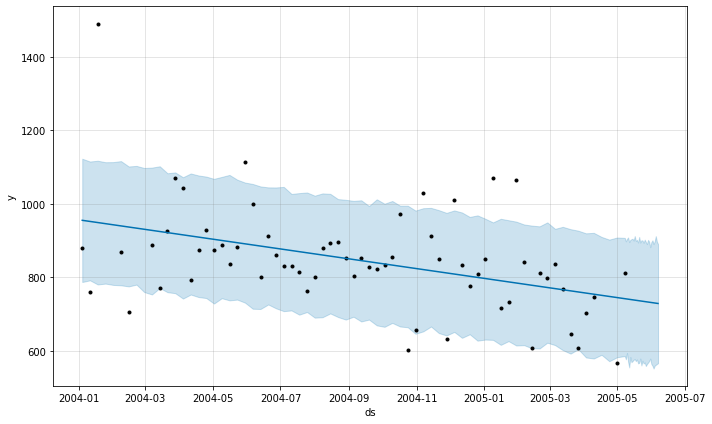

In [189]:
# Plot forecast
m.plot(forecast).show()

No gráfico, podemos notar que foi adotada simplesmente uma linha decrescente em direção aos períodos mais atuais. Além dele, é possível visualizar os componentes criados pelo modelo, como a identificação de tendências ou sazonalidades com o método a seguir. 

Nesse caso, a série apresentou apenas a tendência decrescente que foi utilizada nas predições, sem nenhuma sazonalidade.

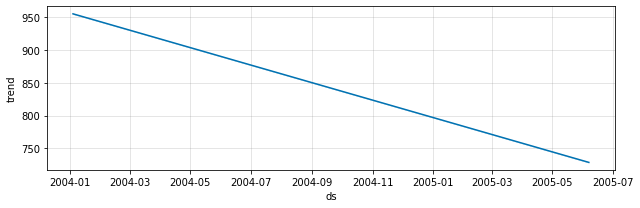

In [190]:
# Plot forecast's components
m.plot_components(forecast).show()

### 4.2.3. Avaliando o modelo

Ao finalizar as predições, é importante que sejam verificados os resultados obtidos pelo modelo nas predições. Para isso vamos utilizar os dados estruturados a partir de uma tabela comparativa, que será criada a seguir. 

In [192]:
# Dados de reais e previstos
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()    

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2004-01-04,955.045776,787.084803,1122.676863,880.666667
2004-01-11,951.998470,791.674419,1115.076333,760.484990
2004-01-18,948.951165,780.429529,1117.232694,1490.333333
2004-01-25,945.903859,782.742970,1113.208903,NaN
2004-02-01,942.856554,779.170046,1113.465400,NaN


Com os dados reais e previstos estruturados, vamos calcular a o ***Mean Absolute Percentage Error* (MAPE)** e o ***Mean Absolute Error* (MAE)**

MAPE 20.11188526925488
MAE 183.66341226927466


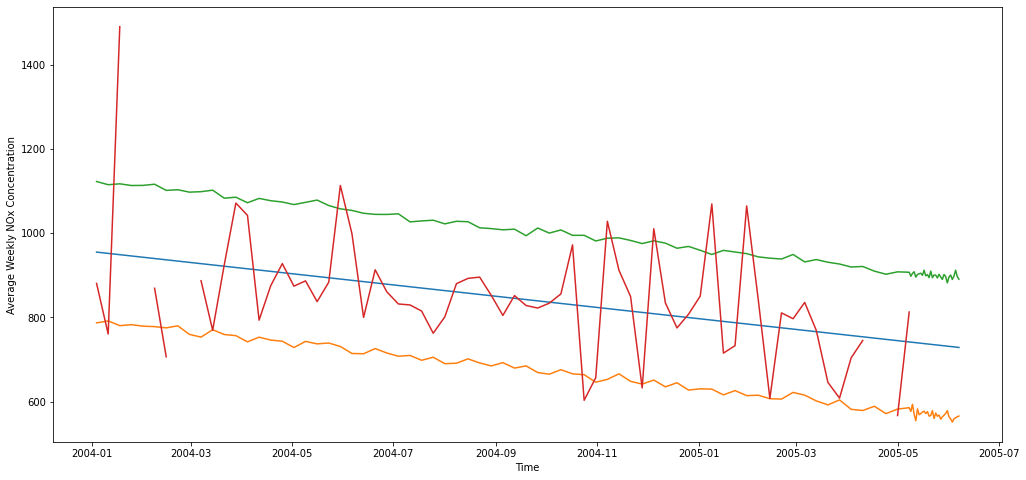

In [195]:
def calculate_forecast_errors(df, prediction_size):    
    df = df.copy()
    # Calcula os valores de erro e seus percentuais 
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    # Utiliza apenas os dados previstos
    predicted_part = df[-prediction_size:]
    # calcula a média de erro de cada tipo
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()

Acima podemos conferir o gráfico com os dados da predicão, que para as métricas escolhidas, o modelo obteve um MAPE de 20,11% e um MAE de 183.66, sem grandes refinamentos do modelo.